# Assignment: Movie Ratings & Revenue Analysis

###Step 1: Create a CSV – movies.csv

In [1]:
import pandas as pd

data = """MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000"""

# Save to CSV
with open("movies.csv", "w") as file:
    file.write(data)

# Download the "movies.csv" csv file
from google.colab import files
files.download("movies.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## PART 1: Pandas Operations

###1. Load movies.csv into a Pandas DataFrame.

In [2]:
df = pd.read_csv("movies.csv")
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


###2. Convert ReleaseDate to datetime.

In [3]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


###3. Calculate Profit = Revenue - Budget .

In [4]:
df['Profit'] = df['Revenue'] - df['Budget']
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit  
0  160000000  6.655328e+08  
1  185000000  8.195584e+08  
2  200000000  1.987464e+09  
3  165000000  5.124713e+08  
4   55000000  1.019251e+09  
5   29000000           NaN  
6  356000000  2.441801e+09  


###4. Add a column "Era" :

Before 2000 → Classic

2000-2010 → Mid

After 2010 → Modern

In [5]:
df['Era'] = df['ReleaseDate'].dt.year.apply(
    lambda x: 'Classic' if x < 2000 else 'Mid' if x <= 2010 else 'Modern'
)
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


###5. Handle nulls in Revenue by filling with average revenue.

In [6]:
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


###6. Sort by Rating descending.

In [7]:
df_sorted = df.sort_values(by='Rating', ascending=False)
print(df_sorted)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   

      Budget        Profit      Era  
1  185000000  8.195584e+08      Mid  
0  160000000  6.655328e+08      Mid  
3  165000000  5.124713e+08   Modern  
6  356000000  2.441801e+09   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
2  200000000  1.987464e+09  Classic  


###7. Group by Genre → average Rating & total Revenue.

In [8]:
genre_stats = df.groupby('Genre').agg({'Rating': 'mean', 'Revenue': 'sum'})
print(genre_stats)

         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


###8. Filter movies with Rating ≥ 8.5 and Profit > 500M.

In [9]:
high_perf_movies = df[(df['Rating'] >= 8.5) & (df['Profit'] > 500_000_000)]
print(high_perf_movies)

   MovieID            Title   Genre ReleaseDate  Rating       Revenue  \
0        1        Inception  Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2  The Dark Knight  Action  2008-07-18     9.0  1.004558e+09   
3        4     Interstellar  Sci-Fi  2014-11-07     8.6  6.774713e+08   

      Budget       Profit     Era  
0  160000000  665532764.0     Mid  
1  185000000  819558444.0     Mid  
3  165000000  512471339.0  Modern  


###9. Plot bar chart of Movie Title vs Profit.

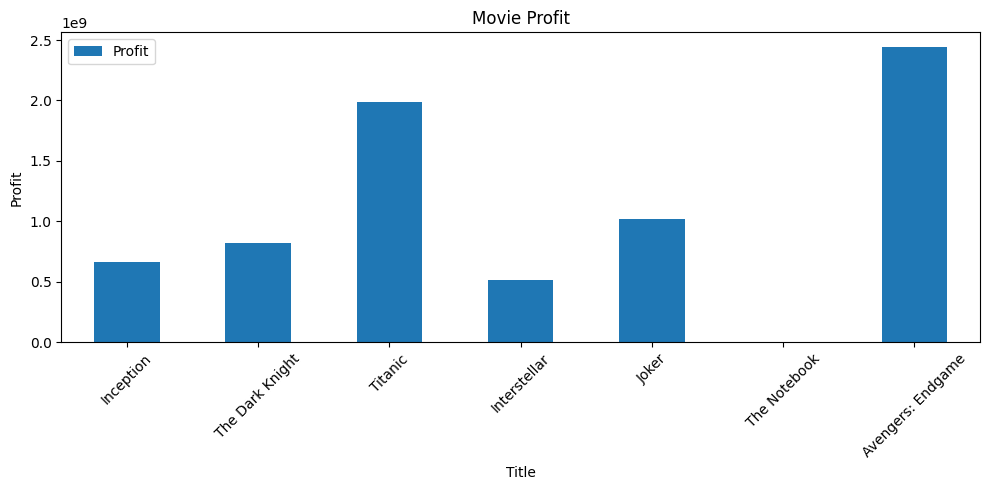

In [10]:
import matplotlib.pyplot as plt
df.plot(x='Title', y='Profit', kind='bar', figsize=(10,5))
plt.title("Movie Profit")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PART 2: PySpark Operations

###1. Read the same CSV using PySpark.

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, to_date, year, month, rank
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("MovieAnalysis").getOrCreate()

# Read CSV
df_spark = spark.read.option("header", True).option("inferSchema", True).csv("movies.csv")
print(df_spark.show())

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+

None


###2. Create Profit column ( Revenue - Budget ).

In [12]:
df_spark = df_spark.withColumn("Profit", col("Revenue") - col("Budget"))
print(df_spark.show())

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+

None


###3. Filter where Genre == 'Sci-Fi' and Profit > 500000000 .

In [44]:
df_spark.filter((col("Genre") == "Sci-Fi") & (col("Profit") > 500_000_000)).show()

+-------+------------+------+-----------+------+---------+---------+-----------+----+-----+----------+
|MovieID|       Title| Genre|ReleaseDate|Rating|  Revenue|   Profit|RatingClass|Year|Month|ProfitRank|
+-------+------------+------+-----------+------+---------+---------+-----------+----+-----+----------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|825532764|665532764|        Hit|2010|    7|         1|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|677471339|512471339|        Hit|2014|   11|         2|
+-------+------------+------+-----------+------+---------+---------+-----------+----+-----+----------+



###4. Group by Genre → avg(Rating) , sum(Profit)

In [45]:
df_spark.groupBy("Genre").agg({'Rating': 'avg', 'Profit': 'sum'}).show()

+-------+-----------+-----------+
|  Genre|avg(Rating)|sum(Profit)|
+-------+-----------+-----------+
|Romance|       7.85| 1987463944|
|  Drama|        8.4| 1019251311|
| Action|        8.7| 3261359008|
| Sci-Fi|        8.7| 1178004103|
+-------+-----------+-----------+



###5. Use when().otherwise() to classify Rating as:

=9 → Blockbuster

8–9 → Hit

below 8 → Average

In [15]:
df_spark = df_spark.withColumn(
    "RatingClass",
    when(col("Rating") == 9.0, "Blockbuster")
    .when((col("Rating") >= 8.0) & (col("Rating") < 9.0), "Hit")
    .otherwise("Average")
)
print(df_spark.show())

+-------+-----------------+-------+-----------+------+----------+---------+----------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|RatingClass|
+-------+-----------------+-------+-----------+------+----------+---------+----------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|        Hit|
+-------+-

###6. Drop the Budget column.

In [16]:
df_spark = df_spark.drop("Budget")
print(df_spark.show())

+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingClass|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL|      NULL|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Hit|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+

None


###7. Fill null revenue with average (use na.fill() or na.replace()).

In [17]:
avg_revenue = df_spark.selectExpr("avg(Revenue)").first()[0]
df_spark = df_spark.na.fill({"Revenue": avg_revenue})
print(df_spark.show())

+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingClass|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Hit|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+

None


###8. Convert ReleaseDate to date type, extract year and month .

In [18]:
df_spark = df_spark.withColumn("ReleaseDate", to_date("ReleaseDate"))
df_spark = df_spark.withColumn("Year", year("ReleaseDate"))
df_spark = df_spark.withColumn("Month", month("ReleaseDate"))
print(df_spark.show())

+-------+-----------------+-------+-----------+------+----------+----------+-----------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingClass|Year|Month|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Hit|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|Blockbuster|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|    Average|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Hit|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Hit|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|    Average|2004|    6|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Hit|2019|    4|


###9. Use a window function to rank movies within each genre by profit.

In [19]:
windowSpec = Window.partitionBy("Genre").orderBy(col("Profit").desc())
df_spark = df_spark.withColumn("ProfitRank", rank().over(windowSpec))
df_spark.select("Title", "Genre", "Profit", "ProfitRank").show()

+-----------------+-------+----------+----------+
|            Title|  Genre|    Profit|ProfitRank|
+-----------------+-------+----------+----------+
|Avengers: Endgame| Action|2441800564|         1|
|  The Dark Knight| Action| 819558444|         2|
|            Joker|  Drama|1019251311|         1|
|          Titanic|Romance|1987463944|         1|
|     The Notebook|Romance|      NULL|         2|
|        Inception| Sci-Fi| 665532764|         1|
|     Interstellar| Sci-Fi| 512471339|         2|
+-----------------+-------+----------+----------+



##PART 3: JSON + Union Example

###movies_bonus.json

In [20]:
import json

movies_bonus = [
  {"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue": 1456000000, "Budget": 145000000},
  {"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue": 950000000, "Budget": 100000000}
]

with open("movies_bonus.json", "w") as f:
    json.dump(movies_bonus, f, indent=4)

# Download the "movies_bonus.json" JSON file
from google.colab import files
files.download("movies_bonus.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###1. Read this JSON using PySpark.

In [21]:
# Load the original movies.csv
df_movies = spark.read.csv("movies.csv", header=True, inferSchema=True)
df_movies.show()

# Load the movies_bonus.json
df_json = spark.read.json("movies_bonus.json", multiLine=True)
df_json.show()

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+

+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+--------

###2. Union it with your original movies DataFrame.

In [22]:
# View and match columns
print("Original df_movies columns:", df_movies.columns)
print("Bonus df_bonus columns:", df_json.columns)

Original df_movies columns: ['MovieID', 'Title', 'Genre', 'ReleaseDate', 'Rating', 'Revenue', 'Budget']
Bonus df_bonus columns: ['Budget', 'Genre', 'MovieID', 'Rating', 'Revenue', 'Title']


In [23]:
# Import the required function
from pyspark.sql.functions import lit

# Add the missing ReleaseDate column and reorder
df_bonus_fixed = df_json \
    .withColumn("ReleaseDate", lit(None).cast("string")) \
    .select("MovieID", "Title", "Genre", "ReleaseDate", "Rating", "Revenue", "Budget")

# Union the DataFrames
df_combined = df_movies.union(df_bonus_fixed)
df_combined.show(truncate=False)

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|Title            |Genre  |ReleaseDate|Rating|Revenue   |Budget   |
+-------+-----------------+-------+-----------+------+----------+---------+
|1      |Inception        |Sci-Fi |2010-07-16 |8.8   |825532764 |160000000|
|2      |The Dark Knight  |Action |2008-07-18 |9.0   |1004558444|185000000|
|3      |Titanic          |Romance|1997-12-19 |7.8   |2187463944|200000000|
|4      |Interstellar     |Sci-Fi |2014-11-07 |8.6   |677471339 |165000000|
|5      |Joker            |Drama  |2019-10-04 |8.4   |1074251311|55000000 |
|6      |The Notebook     |Romance|2004-06-25 |7.9   |NULL      |29000000 |
|7      |Avengers: Endgame|Action |2019-04-26 |8.4   |2797800564|356000000|
|8      |Barbie           |Drama  |NULL       |7.5   |1456000000|145000000|
|9      |Oppenheimer      |Drama  |NULL       |8.6   |950000000 |100000000|
+-------+-----------------+-------+-----------+------+----------+---------+



###3. Show top 5 highest grossing movies.

In [24]:
df_combined.orderBy(df_combined.Revenue.desc()).show(5, truncate=False)

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|Title            |Genre  |ReleaseDate|Rating|Revenue   |Budget   |
+-------+-----------------+-------+-----------+------+----------+---------+
|7      |Avengers: Endgame|Action |2019-04-26 |8.4   |2797800564|356000000|
|3      |Titanic          |Romance|1997-12-19 |7.8   |2187463944|200000000|
|8      |Barbie           |Drama  |NULL       |7.5   |1456000000|145000000|
|5      |Joker            |Drama  |2019-10-04 |8.4   |1074251311|55000000 |
|2      |The Dark Knight  |Action |2008-07-18 |9.0   |1004558444|185000000|
+-------+-----------------+-------+-----------+------+----------+---------+
only showing top 5 rows



###4. Save final merged DataFrame as CSV.

In [25]:
df_combined.write.mode("overwrite").option("header", True).csv("combined_movies.csv")

##Bonus:

###Create a column ReturnOnInvestment = Profit / Budget

In [36]:
from pyspark.sql.functions import expr

df_roi = df_combined.withColumn("ReturnOnInvestment", expr("(Revenue - Budget)/Budget"))
df_roi.select("Title", "Budget", "Revenue", "ReturnOnInvestment").show()

+-----------------+---------+----------+------------------+
|            Title|   Budget|   Revenue|ReturnOnInvestment|
+-----------------+---------+----------+------------------+
|        Inception|160000000| 825532764|       4.159579775|
|  The Dark Knight|185000000|1004558444| 4.430045643243243|
|          Titanic|200000000|2187463944|        9.93731972|
|     Interstellar|165000000| 677471339| 3.105886903030303|
|            Joker| 55000000|1074251311| 18.53184201818182|
|     The Notebook| 29000000|      NULL|              NULL|
|Avengers: Endgame|356000000|2797800564| 6.858990348314607|
|           Barbie|145000000|1456000000| 9.041379310344828|
|      Oppenheimer|100000000| 950000000|               8.5|
+-----------------+---------+----------+------------------+



###Show top ROI movies (minimum budget 50M)

In [37]:
df_roi.filter(df_roi.Budget >= 50000000).orderBy(df_roi.ReturnOnInvestment.desc()).show(5, truncate=False)

+-------+-----------------+-------+-----------+------+----------+---------+------------------+
|MovieID|Title            |Genre  |ReleaseDate|Rating|Revenue   |Budget   |ReturnOnInvestment|
+-------+-----------------+-------+-----------+------+----------+---------+------------------+
|5      |Joker            |Drama  |2019-10-04 |8.4   |1074251311|55000000 |18.53184201818182 |
|3      |Titanic          |Romance|1997-12-19 |7.8   |2187463944|200000000|9.93731972        |
|8      |Barbie           |Drama  |NULL       |7.5   |1456000000|145000000|9.041379310344828 |
|9      |Oppenheimer      |Drama  |NULL       |8.6   |950000000 |100000000|8.5               |
|7      |Avengers: Endgame|Action |2019-04-26 |8.4   |2797800564|356000000|6.858990348314607 |
+-------+-----------------+-------+-----------+------+----------+---------+------------------+
only showing top 5 rows



###Plot genre-wise ROI as a bar chart using Pandas

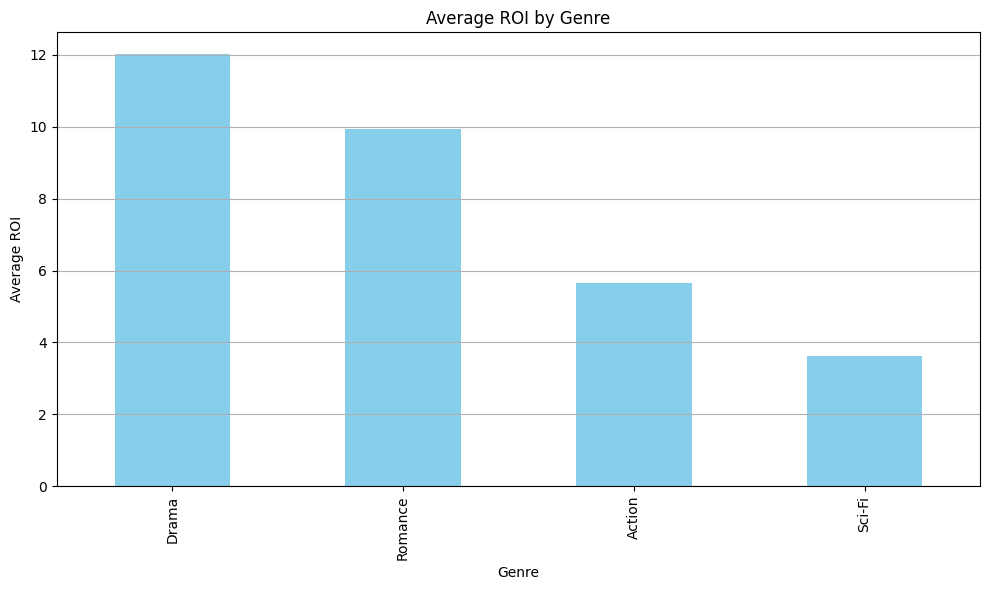

In [38]:
# Convert to Pandas
df_pandas = df_roi.select("Genre", "ReturnOnInvestment").toPandas()

# Group by genre and calculate average ROI
genre_roi = df_pandas.groupby("Genre")["ReturnOnInvestment"].mean().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
genre_roi.plot(kind='bar', color='skyblue')
plt.title("Average ROI by Genre")
plt.xlabel("Genre")
plt.ylabel("Average ROI")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Download the combined_movies file

In [39]:
df_combined.show(5)
df_combined.count()


+-------+---------------+-------+-----------+------+----------+---------+
|MovieID|          Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+---------------+-------+-----------+------+----------+---------+
|      1|      Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|        Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|   Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|          Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
+-------+---------------+-------+-----------+------+----------+---------+
only showing top 5 rows



9

In [40]:
df_combined.coalesce(1).write.mode("overwrite").option("header", True).csv("combined_movies")


In [41]:
import os
os.listdir("combined_movies")


['._SUCCESS.crc',
 '.part-00000-03e127d9-8a7a-469e-8d9f-19b2114abd59-c000.csv.crc',
 '_SUCCESS',
 'part-00000-03e127d9-8a7a-469e-8d9f-19b2114abd59-c000.csv']

In [42]:
import shutil

# Get the actual CSV file name inside the folder
for file in os.listdir("combined_movies"):
    if file.endswith(".csv"):
        shutil.move(f"combined_movies/{file}", "combined_movies.csv")
        break


In [43]:
from google.colab import files
files.download("combined_movies.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>